In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from scipy.ndimage import measurements, morphology
from skimage.morphology import disk
from scipy.ndimage import filters
from sympy import symbols, Eq, solve
import math

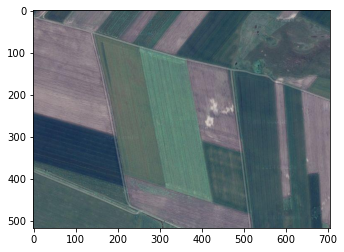

In [2]:
im_rgb = Image.open('database/H12.bmp') #képobjektum
plt.imshow(im_rgb)

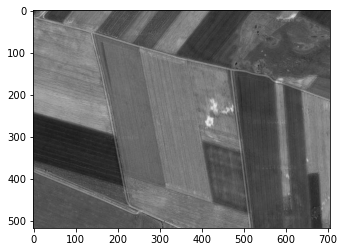

In [3]:
im_gray = np.array(im_rgb.convert("L"))
plt.imshow(im_gray,'gray')

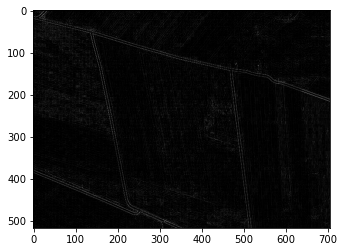

In [4]:
im_laplace = filters.laplace(np.int16(im_gray))
im_laplace_limited = np.minimum(np.maximum(im_laplace,0),255)
plt.imshow(im_laplace_limited,'gray')

(array([[  0., 109.,  28., ...,   1.,   0.,   0.],
        [  0., 109.,  30., ...,   2.,   0.,   0.],
        [  0., 109.,  26., ...,   1.,   0.,   0.],
        ...,
        [  0.,  17.,  70., ...,   0.,   0.,   0.],
        [  0.,  12.,  70., ...,   3.,   0.,   0.],
        [  0.,   7.,  87., ...,   0.,   0.,   0.]]),
 array([ 22. ,  42.1,  62.2,  82.3, 102.4, 122.5, 142.6, 162.7, 182.8,
        202.9, 223. ]),
 <a list of 705 BarContainer objects>)

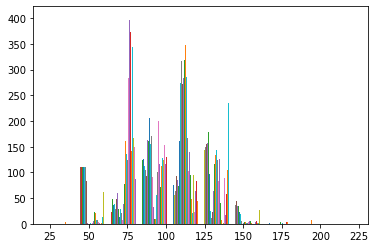

In [5]:
plt.hist(im_gray)

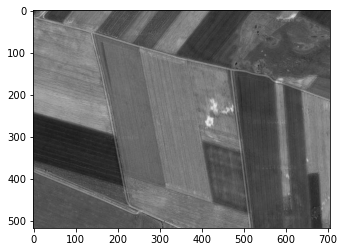

In [6]:
br = 2
con = 1.1
im_bc = con * np.int16(im_gray) + br
im_bc_limited = np.minimum(np.maximum(im_bc,0),255)
plt.imshow(im_bc_limited,'gray')

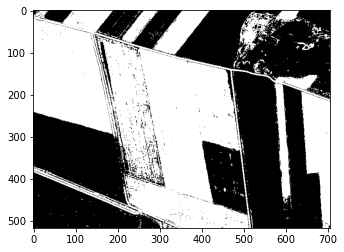

In [7]:
im_bin = im_bc_limited > im_bc_limited.mean()
plt.imshow(im_bin,'gray')

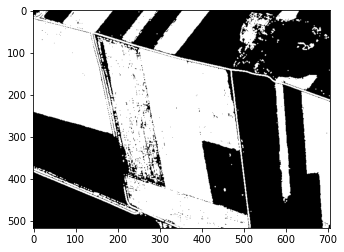

In [8]:
str_elem = disk(1)
im_opened = morphology.binary_opening(im_bin, structure = str_elem)
plt.imshow(im_opened,'gray')

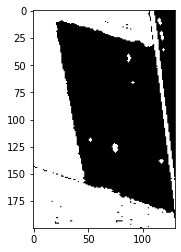

In [9]:
cropped_image  = im_opened[300:500,380:510]
plt.imshow(cropped_image, 'gray')

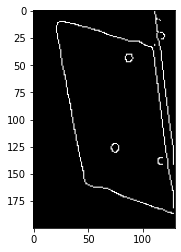

In [10]:
im_edges = canny(cropped_image,3)
plt.imshow(im_edges,'gray')

In [11]:
tested_angles = np.linspace(-np.pi/2, np.pi/2, 100) #sorozat, mettől meddig, hány elem
h, theta, d = hough_line(im_edges[10:-10,10:-10], theta = tested_angles) #min keresek, konstanskent megadni a szögeket

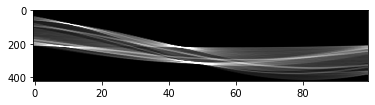

In [12]:
plt.imshow(h, 'gray', aspect = 0.05, vmax = 10) #aspect az az arány

In [13]:
hspace, angles, dists = hough_line_peaks(h, theta, d, num_peaks = 4, threshold = 0.2 * np.max(h))
angles, dists

(array([-0.17453293, -1.28519699, -0.14279967, -1.25346374]),
 array([  10.52494062,    5.51306413,   94.72446556, -129.80760095]))

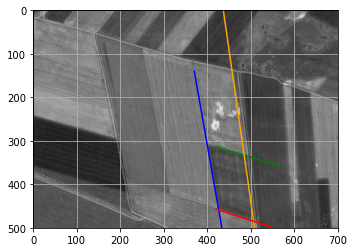

In [14]:
x0 = np.linspace(0, 150, 1000)
y1 = -(x0*np.cos(angles[0]) - dists[0]) / np.sin(angles[0])
y2 = -(x0*np.cos(angles[1]) - dists[1]) / np.sin(angles[1])
y3 = -(x0*np.cos(angles[2]) - dists[2]) / np.sin(angles[2])
y4 = -(x0*np.cos(angles[3]) - dists[3]) / np.sin(angles[3])

fig, ax = plt.subplots()
ax.grid(True)
ax.axhline(y = 0, color='k', linewidth=1)
ax.axvline(x = 0, color='k', linewidth=1)
ax.set_ylim([0,500])
ax.set_xlim([0,700])

ax.imshow(im_gray, 'gray')
ax.plot(x0+370, y1+200, color="b")
ax.plot(x0+420, y2+320, color="g")
ax.plot(x0+370, y3+200, color="orange")
ax.plot(x0+420, y4+320, color="r")
plt.gca().invert_yaxis() #horizontal flip
plt.show()

In [15]:
x, y = symbols('x y')
# y1 és y2 metszéspontja
eq1 = Eq((x*np.cos(angles[0]) - dists[0]) / np.sin(angles[0]), y)
eq2 = Eq((x*np.cos(angles[1]) - dists[1]) / np.sin(angles[1]), y)
x1 = solve((eq1,eq2), (x, y))[x]
y1 = solve((eq1,eq2), (x, y))[y]

# y2 és y3 metszéspontja
eq1 = Eq((x*np.cos(angles[1]) - dists[1]) / np.sin(angles[1]), y)
eq2 = Eq((x*np.cos(angles[2]) - dists[2]) / np.sin(angles[2]), y)
x2 = solve((eq1,eq2), (x, y))[x]
y2 = solve((eq1,eq2), (x, y))[y]

# y3 és y4 metszéspontja
eq1 = Eq((x*np.cos(angles[2]) - dists[2]) / np.sin(angles[2]), y)
eq2 = Eq((x*np.cos(angles[3]) - dists[3]) / np.sin(angles[3]), y)
x3 = solve((eq1,eq2), (x, y))[x]
y3 = solve((eq1,eq2), (x, y))[y]

# y1 és y4 metszéspontja
eq1 = Eq((x*np.cos(angles[0]) - dists[0]) / np.sin(angles[0]), y)
eq2 = Eq((x*np.cos(angles[3]) - dists[3]) / np.sin(angles[3]), y)
x4 = solve((eq1,eq2), (x, y))[x]
y4 = solve((eq1,eq2), (x, y))[y]

In [16]:
# két átló által bezárt szög
# AC = x4 - x2; y4 - y2
# BD = x1 - x3; y1 -y3
AC_length = math.sqrt(((x4 - x2)**2) + ((y4 - y2)**2))
BD_length = math.sqrt(((x1 - x3)**2) + ((y1 - y3)**2))
AC_BD_skalar = ((x4 - x2) * (x1 - x3)) + ((y4 - y2) * (y1 -y3))
alfa = math.acos(AC_BD_skalar / (AC_length * BD_length))
alfa

2.127435061046965

In [17]:
# négyszög területe
T = (AC_length * BD_length * np.sin(alfa)) / 2
T

12517.197677999931

<h4> A választott mező területe: 12517.2 </h4>